In [1]:
#THIS NOTEBOOK GENERATES ALL SUPPLEMENTARY FIGURES IN CATALÁN ET AL. (2020)

In [24]:
from functions import *

In [ ]:
#SUPP FIG S1

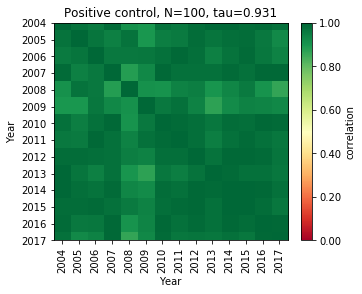

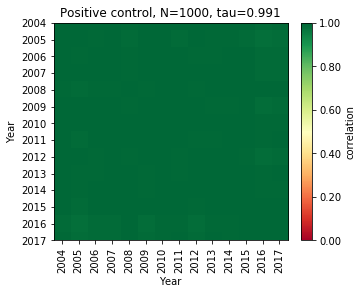

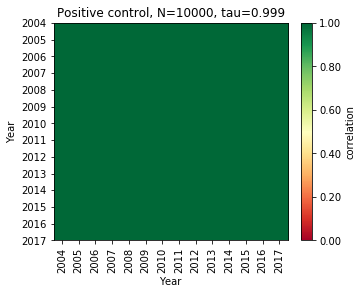

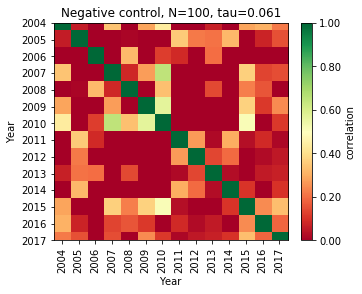

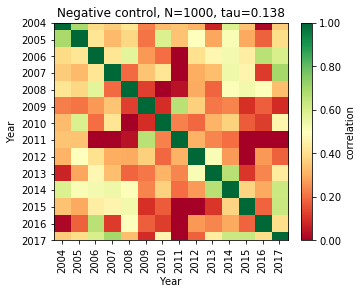

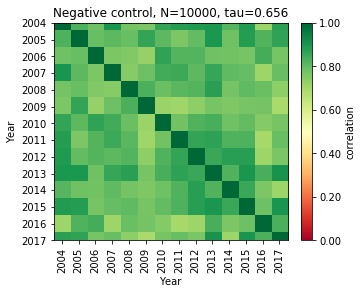

In [2]:
#SUPP FIG S3a

#CONTROLS
Y=range(2004,2018)
bins=np.arange(-10.5,11.5,1)
z=np.zeros(len(bins))
NL=[100,1000,10000]
#POSITIVE CONTROL
for N in NL:
    H=[z for y in Y]
    for j,y in enumerate(Y):
        RD=np.random.normal(0.0,1.0,N)
        h,b1=np.histogram(RD, bins=bins, density=True)
        H[j]=h
    H=np.array(H)
    R=np.corrcoef(H)
    tau,tauN=tautest(R)
    fig=plt.figure()
    ax=plt.gca()
    I=corrplot(R,Y,ax,fig,'Positive control, N='+str(N)+', tau='+str(tau)[0:5])

#NEGATIVE CONTROL
for N in NL:
    H=[z for y in Y]
    for j,y in enumerate(Y):
        RD=np.random.randint(-10,10+1,N)+np.random.normal(0,1,N)
        h,b1=np.histogram(RD, bins=bins, density=True)
        H[j]=h
    H=np.array(H)
    R=np.corrcoef(H)
    tau,tauN=tautest(R)
    fig=plt.figure()
    ax=plt.gca()
    I=corrplot(R,Y,ax,fig,'Negative control, N='+str(N)+', tau='+str(tau)[0:5])

Ttest_1sampResult(statistic=100.61908229670384, pvalue=0.0)
2 Ttest_1sampResult(statistic=14.10486626207043, pvalue=2.5471867755833193e-18)
3 Ttest_1sampResult(statistic=23.697321649182093, pvalue=6.474893809770573e-38)
4 Ttest_1sampResult(statistic=14.467931668702196, pvalue=4.868475717937803e-17)
5 Ttest_1sampResult(statistic=21.726118911470653, pvalue=2.143592264141138e-23)
6 Ttest_1sampResult(statistic=81.7262697400359, pvalue=2.3788672866782815e-199)
7 Ttest_1sampResult(statistic=32.514364891429395, pvalue=1.7848708417599882e-11)
8 Ttest_1sampResult(statistic=15.846153227149719, pvalue=1.6201715083287129e-13)
9 Ttest_1sampResult(statistic=7.964346634922592, pvalue=0.0005033353781695156)
10 Ttest_1sampResult(statistic=14.413298530476082, pvalue=1.387811806586935e-10)
11 Ttest_1sampResult(statistic=14.425543223071994, pvalue=4.9336034964424516e-12)
12 Ttest_1sampResult(statistic=25.944097639036944, pvalue=1.9132852062224176e-24)
13 Ttest_1sampResult(statistic=16.898874794562456, pva

Text(0, 0.5, '$\\tau_N$')

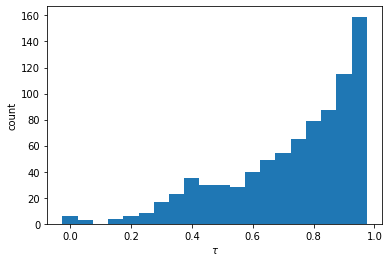

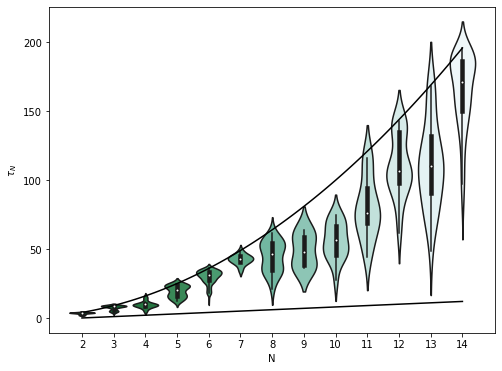

In [5]:
#SUPP FIG S3B
from scipy import stats
import seaborn as sns
DFdist=pd.read_csv('results/correlations/tau_test.csv')
#T-TEST FOR ALL ATLAS
T=stats.ttest_1samp(DFdist['Tau'],0.0)
print(T)
#T-TEST FOR EVERY N
for N in range(2,15):
    DFN=DFdist[DFdist['N']==N]
    TN=stats.ttest_1samp(DFN['TauN'],N)
    print(N,TN)    

#PLOT HISTOGRAM OF TAUS
bins=list(np.arange(0.0,1.05,0.05))
fig=plt.figure()
ax=plt.gca()
n1,b1=np.histogram(DFdist['Tau'], bins=bins)
width=bins[1]-bins[0]
ax.bar(b1[0:-1],n1,width=width)
ax.set_xlabel('$\\tau$')
ax.set_ylabel('count')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

#PLOT TAU VERSUS N
fig=plt.figure(figsize=(8,6))
ax=sns.violinplot(y="TauN",x="N",data=DFdist, scale='width',
                  palette='BuGn_r', inner='box')
xp=np.linspace(0,12,100)
ax.plot(xp,(xp+2)**2,'k-')
ax.plot(xp,xp,'k-')
ax.set_ylabel('$\\tau_N$')

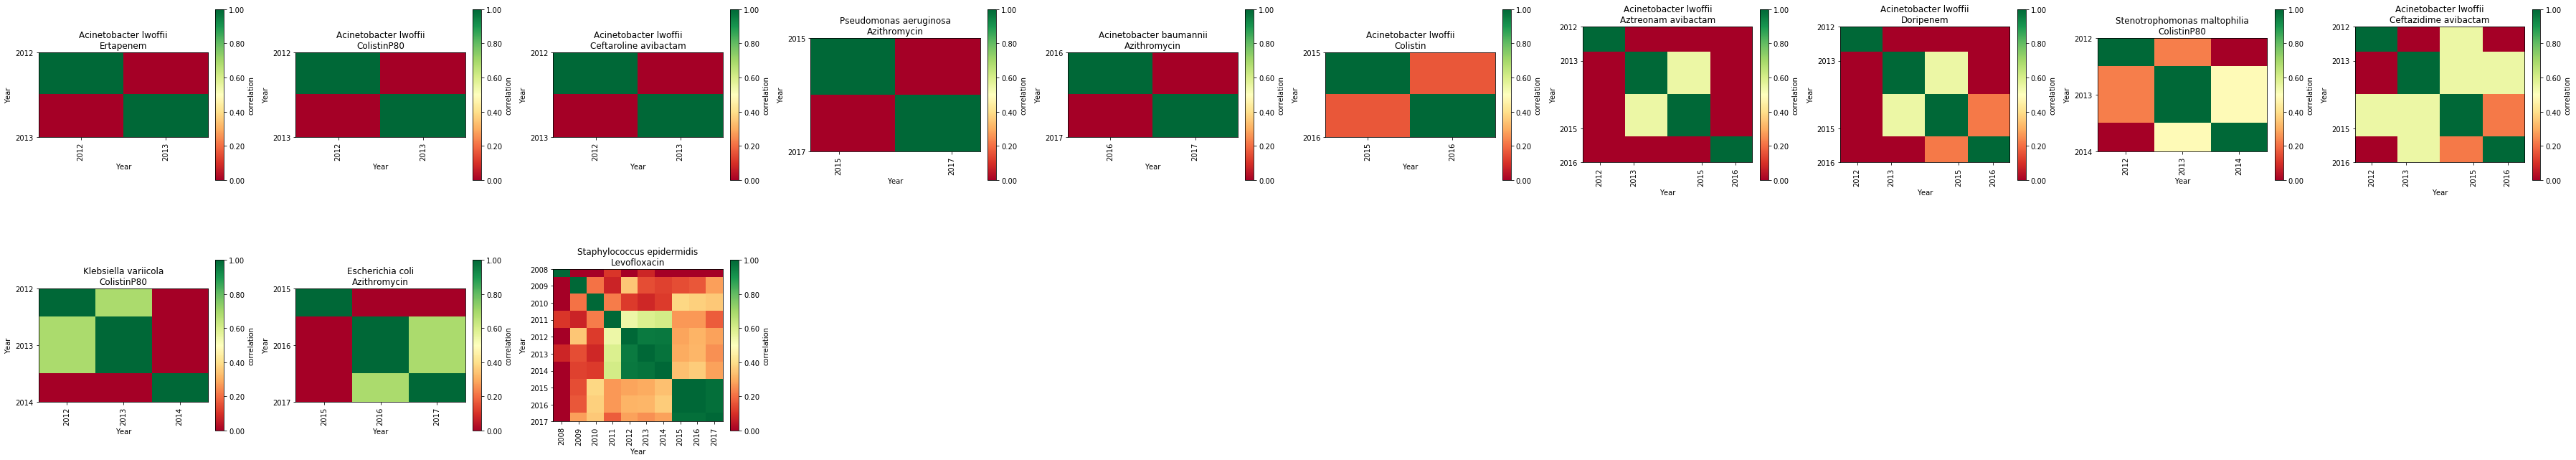

In [26]:
#SUPP FIG S4
from functions import *
DFdist=pd.read_csv('results/correlations/tau_test.csv')
DFdist=DFdist[DFdist.Tau<0.2]
DFdist=DFdist.iloc[::-1]
DFdist=DFdist.reset_index(drop=True)
maxcols=10
maxrows=int(len(DFdist)/maxcols+1)
fig=plt.figure(figsize=(5*maxcols,5*maxrows))
#GENERATE FIGURE
for index,row in DFdist.iterrows():
    sp=row['Species']
    c1=row['Antibiotic']
    ax=fig.add_subplot(maxrows,maxcols,index+1)
    R,Y=read_corr(sp,c1)
    I=corrplot(R,Y,ax,fig,sp+'\n'+c1)
fig.tight_layout()